# Задача 1   

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


**1.2 Изучите стоимости недвижимости**

Text(0, 0.5, 'Количество домов')

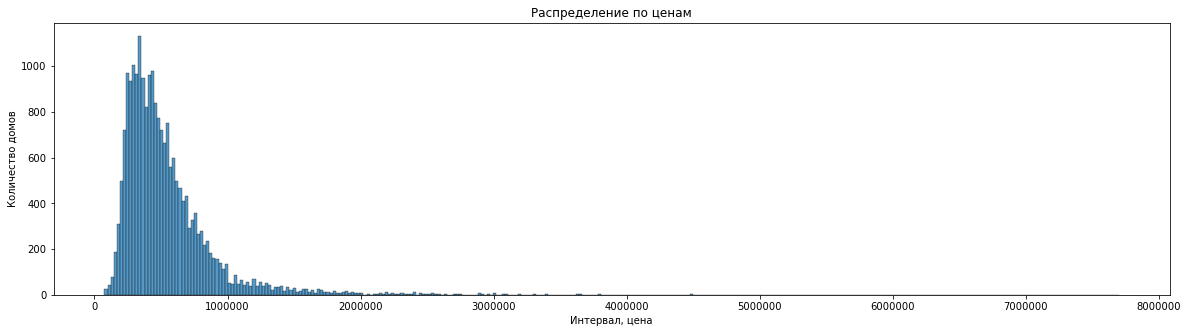

In [3]:
plt.figure(figsize = (20, 5))
sns.histplot(df['price'])
plt.ticklabel_format(style='plain')
plt.title('Распределение по ценам')
plt.xlabel('Интервал, цена')
plt.ylabel('Количество домов')

Text(0, 0.5, 'Количество домов')

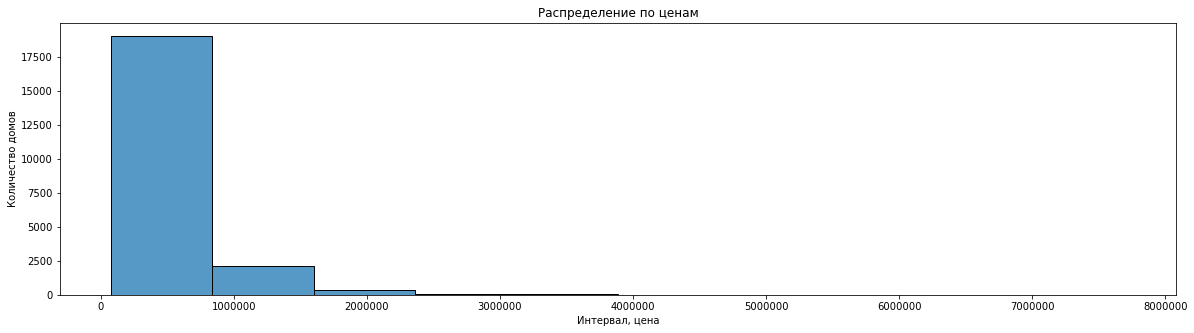

In [4]:
plt.figure(figsize = (20, 5))
sns.histplot(df['price'], bins = 10)
plt.ticklabel_format(style='plain')
plt.title('Распределение по ценам')
plt.xlabel('Интервал, цена')
plt.ylabel('Количество домов')

*Большая часть домов стоит меньше 1 млн (более 17500 домов).*

**1.3 Изучите распределение квадратуры жилой**

Text(0, 0.5, 'Количество домов')

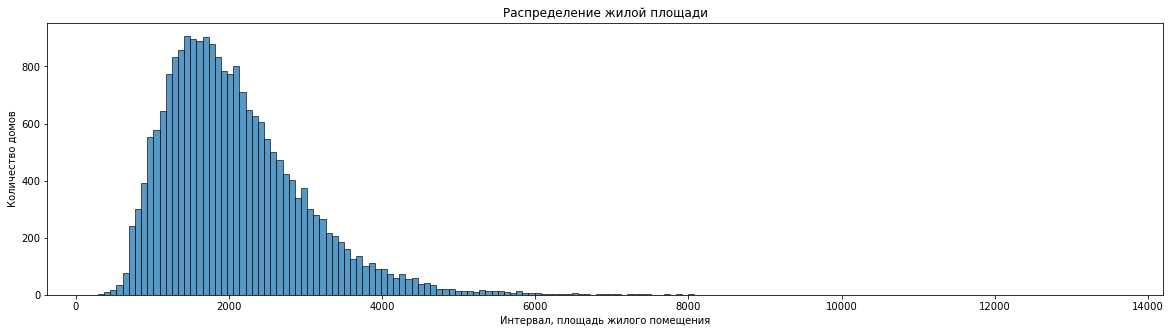

In [6]:
plt.figure(figsize = (20, 5))
sns.histplot(df['sqft_living'])
plt.ticklabel_format(style='plain')
plt.title('Распределение жилой площади')
plt.xlabel('Интервал, площадь жилого помещения')
plt.ylabel('Количество домов')

Чаще всего встречаются дома с жилой площадью 1700 - 1900 кв. футов*

**1.4 Изучите распределение года постройки**

Text(0, 0.5, 'Количество домов')

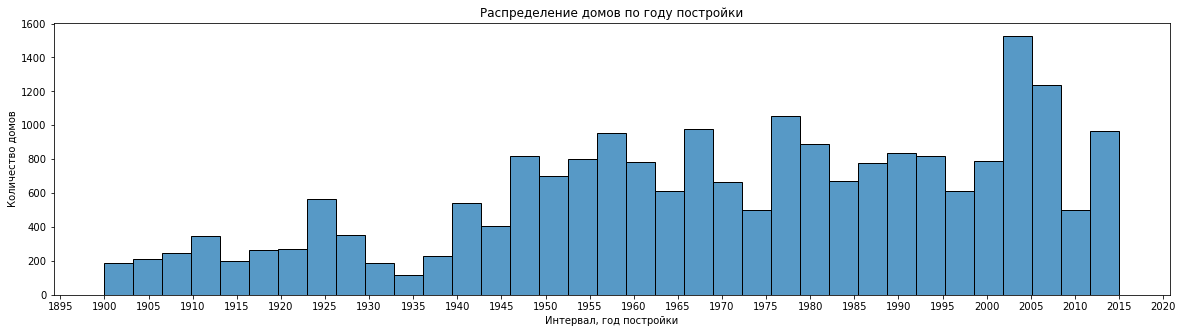

In [13]:
plt.figure(figsize = (20, 5))
sns.histplot(df['yr_built'])
plt.ticklabel_format(style='plain')
plt.locator_params (axis='x', nbins= 40) 
plt.title('Распределение домов по году постройки')
plt.xlabel('Интервал, год постройки')
plt.ylabel('Количество домов')

*Большая часть домов была построена в 2002 - 2005 годах (более 1500 домов).*

## 2 задача

**2.1 Изучите распределение домов от наличия вида на набережную**

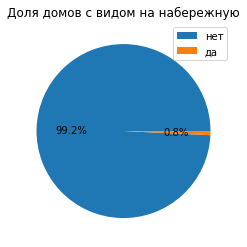

In [25]:
plt.figure(figsize = (6,4))
plt.pie(df['waterfront'].value_counts(), autopct = '%1.1f%%')
plt.title('Доля домов с видом на набережную')
d1.index = ['нет', 'да']
plt.legend(d1.index)

*0,8% домов имеют виды на набережную.*

**2.2 Изучите распределение этажей домов**

C:\Anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


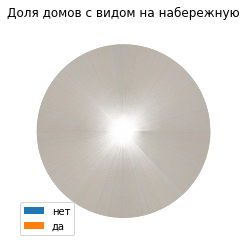

In [27]:
plt.figure(figsize = (6,4))
plt.bar(df['floors'])
plt.title('Доля домов с видом на набережную')
plt.legend(d1.index)

**2.3 Изучите распределение состояния домов**

## 3 задача
**Составьте несколько сводных**

**3.1 Найдите среднюю стоимость домов в зависимости от количества спален.   
Отсортируйте от меньшей стоимости к большей**

In [56]:
df.pivot_table(index = 'bedrooms', 
               values = 'price', 
               aggfunc = 'mean').sort_values('price')

,price
bedrooms,
1,3.176429e+05
2,4.013727e+05
0,4.095038e+05
3,4.662321e+05
11,5.200000e+05
4,6.354195e+05
33,6.400000e+05
5,7.865998e+05
10,8.193333e+05


**3.2 Найдите минимальную, среднюю и максимальную стоимости домов в зависимости от состояния дома**

In [40]:
df.pivot_table(index = 'condition', 
               values = 'price', 
               aggfunc = ['min', 'mean', 'max'])

,min,mean,max
,price,price,price
condition,,,
1,78000.0,334431.666667,1500000.0
2,80000.0,327287.145349,2555000.0
3,75000.0,542012.578148,7062500.0
4,89000.0,521200.390033,7700000.0
5,110000.0,612418.089359,3650000.0


**3.3 Постройте таблицу с подсчетом количества домов в данных в зависимости от вида на набережную и оценкой вида**

In [43]:
pd.crosstab(index = df['view'],
           columns = df['waterfront'])

waterfront,0,1
view,,
0,19489,0
1,331,1
2,955,8
3,491,19
4,184,135


**3.4 Каких домов в зависимости от этажности и количества спален больше?**

In [44]:
pd.crosstab(index = df['floors'],
           columns = df['bedrooms'])

bedrooms,0,1,2,3,4,5,6,7,8,9,10,11,33
floors,,,,,,,,,,,,,
1.0,4,162,1951,5455,2383,605,104,9,5,0,1,0,1
1.5,0,21,182,786,698,185,30,7,1,0,0,0,0
2.0,6,12,497,3118,3682,775,119,19,6,4,2,1,0
2.5,0,1,5,56,58,23,14,2,0,2,0,0,0
3.0,2,3,123,405,61,13,5,1,0,0,0,0,0
3.5,1,0,2,4,0,0,0,0,1,0,0,0,0


*Чаще всего встречается комбинация один этаж + три спальни.*

**3.5 Постройте таблицу с подсчетом медианной стоимости домов в данных в зависимости от состояния дома и оценки дома**

In [45]:
pd.crosstab(index = df['condition'],
           columns = df['grade'],
           values = df['price'],
           aggfunc = 'median')

grade,1,3,4,5,6,7,8,9,10,11,12,13
condition,,,,,,,,,,,,
1,142000.0,NaN,150000.0,190000.0,255000.0,403500.0,932500.0,NaN,NaN,NaN,NaN,NaN
2,NaN,280000.0,145000.0,180000.0,235000.0,305000.0,429000.0,715000.0,1752500.0,NaN,NaN,NaN
3,NaN,75000.0,205000.0,234475.0,265000.0,357500.0,485000.0,689000.0,890000.0,1209500.0,1807500.0,2888000.0
4,NaN,NaN,238525.0,229975.0,295000.0,390000.0,571250.0,823500.0,1030000.0,1685000.0,2125000.0,5750000.0
5,NaN,262000.0,NaN,227450.0,285475.0,456000.0,696000.0,1078000.0,1650000.0,2050000.0,1990000.0,NaN
